# Ecommerce Customer Churn
### Created by : Evelyn Sarah Rumondang

Table of Contents  
1. Business Problem Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Conclusion & Recommendation
6. Save & Load Model

# 1 Business Problem Understanding
## 1.1 Background/ Business Context  
Electronic Commerce (E-commerce) merupakan kegiatan pembelian/penjualan barang/jasa, transmisi dana/data, melalui jaringan elektronik, terutama internet. Transaksi ini dapat terjadi baik secara business-to-business (B2B), business-to-customer (B2C), consumer-to-consumer, atau consumer-to-business.

Pada 20 tahun terakhir, perdagangan dalam bentuk e-commerce berkembang dengan pesat sehingga banyak e-commerce bermunculan. E-commerce mulai berlomba-lomba untuk memberikan fitur dan inovasi yang menarik untuk menarik pelanggan. Persaingan yang ketat terjadi di mana pelanggan dapat berhenti dari satu platform e-commerce ke platform lain dengan mudah. Customer churn adalah peristiwa ketika pelanggan perusahaan berhenti berlanggaanan/tidak membeli dari perusahaan lagi setelah jangka waktu tertentu.

Kali ini, sebagai data scientist, saya akan melakukan churn analysis pada sebuah perusahaan ecommerce dengan model B2C (Business-to-customer). Perusahaan ini menjual produk dari berbagai kategori: Grocery, Fashion, Laptop & Accessory, Mobile, Mobile Phone, dan lain-lain.

Perusahaan ingin mempertahankan pelanggan yang terprediksi akan churn. Data sudah disediakan oleh perusahaan di mana di dalamnya terdapat fitur 'Churn' yang menunjukkan data pelanggan yang churn dan yang tidak, di mana 0 (tidak churn) dan 1 (churn).

## 1.2 Problem Statement 
Customer churn merupakan permasalahan yang sangat penting karena sebagai sumber pendapatan utama perusahaan, pelanggan adalah salah satu aset terpenting dalam perusahaan. Jika tingkat churn tinggi, maka pendapatan keseluruhan perusahaan akan berpengaruh.

Selain itu, secara umum, menurut European Business Review, biaya untuk mencari pelanggan baru 5-6x lebih mahal dibandingkan mempertahankan pelanggan lama. Maka dari itu, Customer Retention (kemampuan sebuah perusahaan mempertahankan customer) sangat penting. Apalagi, sedikit peningkatan pada nilai customer retention bisa menaikkan penjualan dan keuntungan secara dramatis. Maka dari itu, untuk memaksimalisasi keuntungan, perusahaan perlu meningkatkan customer retention.

## 1.3 Goals  
Untuk memaksimalisasi keuntungan, perusahaan ingin menaikkan customer retention dengan cara melakukan churn analysis dari data yang sudah tersedia. Perusahaan ingin (1) mampu memprediksi konsumer mana yang berpotensi akan churn, (2) mengetahui variabel/fitur penting apa saja yang mempengaruhi perilaku churn pelanggan. Hal ini dilakukan agar perusahaan dapat melakukan perencanaan marketing khusus bagi pelanggan-pelanggan yang berpotensi untuk churn.

## 1.4 Analytic Approach  
Menganalisis data untuk menemukan pola dari ciri-ciri pelanggan yang churn. Setelah itu, data scientist dapat membuat model klasifikasi yang dapat memprediksi apakah seorang pelanggan akan churn atau tidak.

Hasil prediksi churn oleh model yang akan dibuat memiliki definisi:  
0 : Negative --> diprediksi masih akan menjadi pelanggan/ tidak akan churn  
1 : Positive --> diprediksi akan berhenti menjadi pelanggan/ churn

## 1.5 Metric Evaluation  

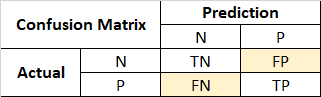

Type 1 Error : **False Positive**  
Pelanggan diprediksi oleh model akan berhenti berbelanja di e-commerce, tetapi ternyata masih menjadi pelanggan.  
Konsekuensi: **pemborosan biaya** retensi, waktu, dan sumber daya (marketing, promo, dll untuk mengembalikan pelanggan).

Type 2 Error : **False Negative**  
Pelanggan diprediksi oleh model masih tetap akan berbelanja di e-commerce, tetapi ternyata berhenti belanja/churn.  
Konsekuensi: **kehilangan pelanggan** sehingga perusahaan akan kehilangan (1) sales & profit dari pelanggan, (2) mengeluarkan biaya untuk mengakuisisi pelanggan baru (yang jauh lebih mahal daripada biaya untuk mempertahankan pelanggan lama)

Lewat konsekuensi-konsekuensi di atas: Dikarenakan biaya untuk mengakuisisi pelanggan baru jauh lebih mahal dibandingkan menaikkan retensi, maka perusahaan akan fokus untuk meminimalisir FN agar perusahaan tidak kehilangan pelanggan.

Supaya perusahaan dapat fokus pada FN tanpa mengabaikan FP sepenuhnya, Metriks Evaluasi utama yang akan digunakan adalah f beta score. Dengan F beta score, data scientist dapat mengatur proporsi FN dan FP. Selain itu, f-beta score juga digunakan karena cocok untuk melihat evaluasi dari dataset yang imbalance.

Sesuai dengan referensi sebelumnya, digunakan *rule-of-thumb* bahwa untuk mengakuisi pelanggan baru 5x lebih mahal dibandingkan dengan mempertahankan pelanggan lama sehingga setiap 1 FN akan menyebabkan kerugian 5x lebih banyak daripada 1 FP. Maka dari itu, weighted average yang digunakan pada fbeta score adalah beta=5

Source:  
https://www.techtarget.com/searchcio/definition/e-commerce  
https://www.zendesk.com/blog/customer-churn-rate/#:~:text=Churn%20rates%20are%20important%20because,is%20to%20keep%20existing%20ones.  
https://www.europeanbusinessreview.com/is-acquiring-new-customers-more-expensive-than-keeping-them/  
https://www.feefo.com/en/business/solutions/customer-retention

In [1]:
# Library
import pandas as pd
import numpy as np

import missingno
from scipy.stats import chi2_contingency

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, f1_score
from sklearn.metrics import SCORERS
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score, recall_score
from sklearn.metrics import precision_score, roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Feature Importance
import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

# 2 Data Understanding

## 2.1 General Information about the Data

Untuk menjawab problem statement di atas, analisis akan dilakukan berdasarkan data yang dikumpulkan perusahaan. Data dapat diakses [di sini](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction).Data dibuat oleh Ankit Verma dan terakhir diperbaharui pada tahun 2020.

In [2]:
# Read Data
df = pd.read_csv('data_ecommerce_customer_churn.csv') # read data dan disimpan pada variabel df

In [3]:
a = df.copy() # data a yang akan digunakan untuk menganalisis, sehingga data df dibiarkan mentah
display(a.head(), a.tail()) # menunjukkan 5 data awal dan akhir dari dataset

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


Data merupakan data pelanggan yang berisi rangkuman aktivitas yang dilakukan pelanggan pada ecommerce.

**Atribut**  
`Tenure` Lama pelanggan menjadi pelanggan (dalam satuan bulan)  
`WarehouseToHome` Jarak antara gudang dengan alamat pelanggan  
`NumberofDeviceRegistered` Jumlah gawai/perangkat yang terdaftar dengan akun pelanggan  
`PreferedOrderCat` Preferensi kategori pelanggan  
`SatisficationScore` Nilai satisfikasi/kepuasan pelanggan (dalam skala 1-5)  
`MaritalStatus` Status pernikahan pelanggan (1 - Sudah menikah, 0 Belum menikah)  
`NumberofAddress`  Jumlah alamat yang ditambahkan pelanggan  
`Complain` Status komplain (1 - Pernah komplain, 0 - Tidak pernah komplain)  
`DaySinceLastOrder` Jumlah hari semenjak terakhir kali pelanggan memesan  
`CashbackAmount` Jumlah uang cashback yang didapatkan pelanggan  
`Churn` Status Churn, Pelanggan berhenti/pindah ke ecommerce lainnya (1 - Churn, 0 - Tidak Churn)

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {a.shape}')
# Informasi pada setiap kolom
a.info()

Jumlah baris dan kolom di dataset df adalah (3941, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [5]:
display (a.describe(), a.describe(include="object")) # deskripsi pada kolom 

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [6]:
# cek keseimbangan data pada target
display (a['Churn'].value_counts(),  # isi data pada variabel churn
         a['Churn'].value_counts()/a.shape[0]*100) # persentase isi data pada variabel churn

0    3267
1     674
Name: Churn, dtype: int64

0    82.897742
1    17.102258
Name: Churn, dtype: float64

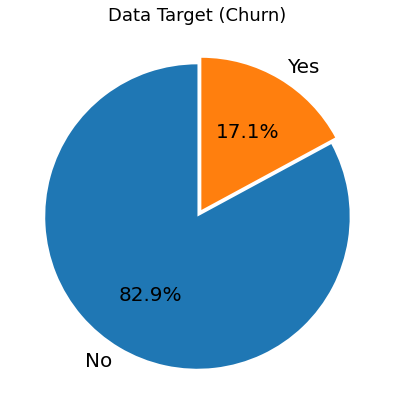

In [7]:
plt.figure(figsize=(7,7))
plt.title("Data Target (Churn)", size=18)
plt.pie(a['Churn'].value_counts(), explode=(0,0.05), labels=['No', 'Yes'], autopct='%1.1f%%',startangle=90, textprops={"fontsize":20})

plt.show()

Data imbalance.

In [8]:
# cek data unik dan missing value
data = []
for i in a.columns:
    data.append([
        i,
        a[i].dtypes, # cek tipe data
        a[i].isna().sum(), # cek jumlah missing value
        round((a[i].isna().sum()/len(a))*100,3), # cek persentase missing value
        a[i].nunique(), # cek jumlah data unik
        a[i].unique() # cek isi data unik
    ])
pd.DataFrame(data=data,
            columns=[
                'Nama Variabel',
                'Tipe Data',
                'Null',
                'Presentase Null',
                'Jumlah Unique',
                'Unique'])

,Nama Variabel,Tipe Data,Null,Presentase Null,Jumlah Unique,Unique
0,Tenure,float64,194,4.923,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.288,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.000,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.000,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.000,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.000,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.000,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.000,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.405,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.000,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


In [9]:
# cek data duplikat
a[a.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [10]:
a['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

Informasi umum yang didapat dari dataset:
1. Data terdiri dari 3941 baris dan 11 kolom
2. Kebanyakan fitur merupakan data numerikal, di mana:
    * Kolom Numerikal: `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`,  `NumberOfAddress`, `DaySinceLastOrder`, `CashbackAmount`
    * Kolom Kategorik:
        * Nominal: `PreferedOrderCat`, `MaritalStatus`
        * Binary (antara 1 & 0): `Churn`, `Complain`
        * Ordinal : `SatisfactionScore`
3. Data tidak seimbang di mana perbandingan antar-target (0 & 1) kira-kira 1:5; Data dengan target 1 hanya terdapat 674 data
4. Terdapat 3 kolom dengan Missing Value, yaitu: `Tenure` (4.9%), `WarehouseToHome` (4.3%), `DaySinceLastOrder` (5.4%)
5. Terdapat 671 data duplikat
6. Pada `PreferedOrderCat` terdapat dua kategori yang mirip yaitu Mobile & Mobile Phone, ini akan dijadikan 1 kategori

## 2.2 Data Cleaning

In [11]:
# Gabung Kategori Mobile dan Mobile Phone
a['PreferedOrderCat'] = a['PreferedOrderCat'].apply(lambda x : 'Mobile Phone' if x == 'Mobile' else x)

### 2.2.1 Data Duplikat

In [12]:
a[a.duplicated()]['Churn'].value_counts()

0    531
1    141
Name: Churn, dtype: int64

Dari 671 data duplikat, terdapat 140 data dengan target 1 (churn). Dikarenakan data dengan target 1 secara keseluruhan sudah sedikit (674 data), data duplikat dengan target 1 tidak dihapus.

In [13]:
# drop data duplikat yang churn-nya sama dengan 0
jmlh = (a[a.duplicated()]['Churn']==0).tolist()
a.drop(index=[index for index, value in enumerate (jmlh) if value == True], inplace = True)

### 2.2.2 Missing Value
Terdapat 3 kolom dengan Missing Value, yaitu: `Tenure` (4.9%), `WarehouseToHome` (4.3%), `DaySinceLastOrder` (5.4%)

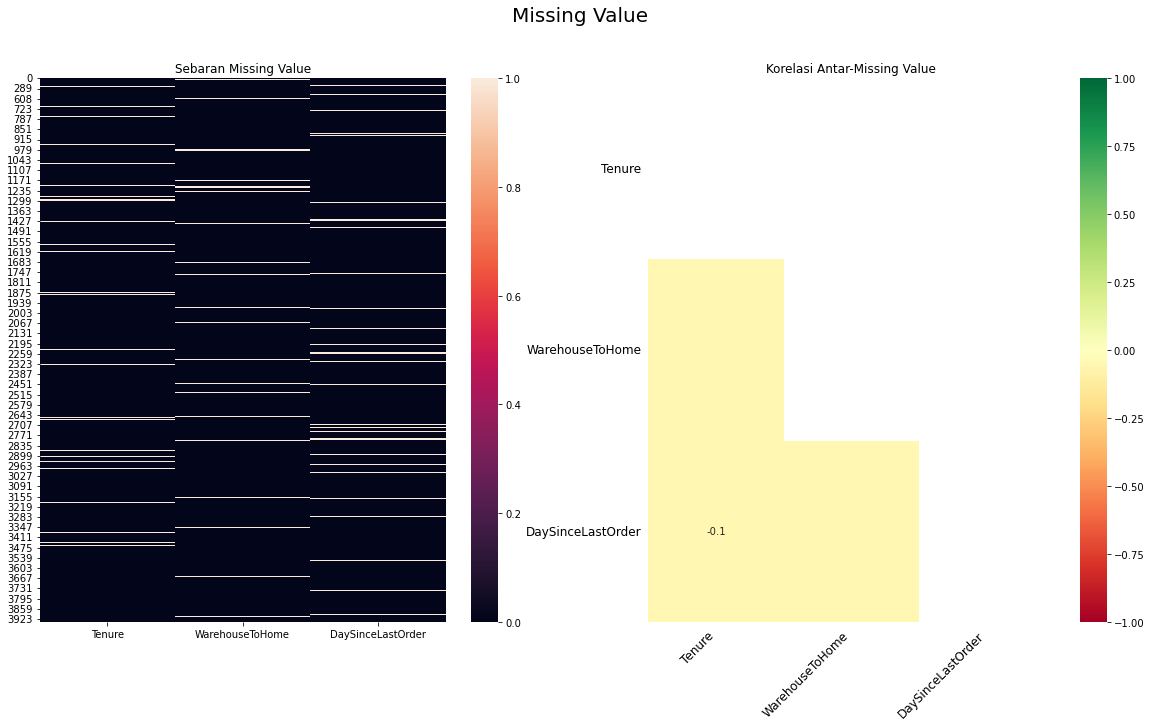

In [14]:
# Tinjau antar-kolom yang memiliki Missing Value
fig, axs = plt.subplots (1,2, figsize=(20,10))
plt.suptitle("Missing Value", size=20)

# Sebaran missing value di dalam data
sns.heatmap(a[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].isna(), ax=axs[0])
axs[0].set_title("Sebaran Missing Value")

# Korelasi antar-kolom dengan missing value di dalam data
missingno.heatmap(a, cmap="RdYlGn", fontsize=12, ax=axs[1]);
axs[1].set_title("Korelasi Antar-Missing Value")

plt.show()

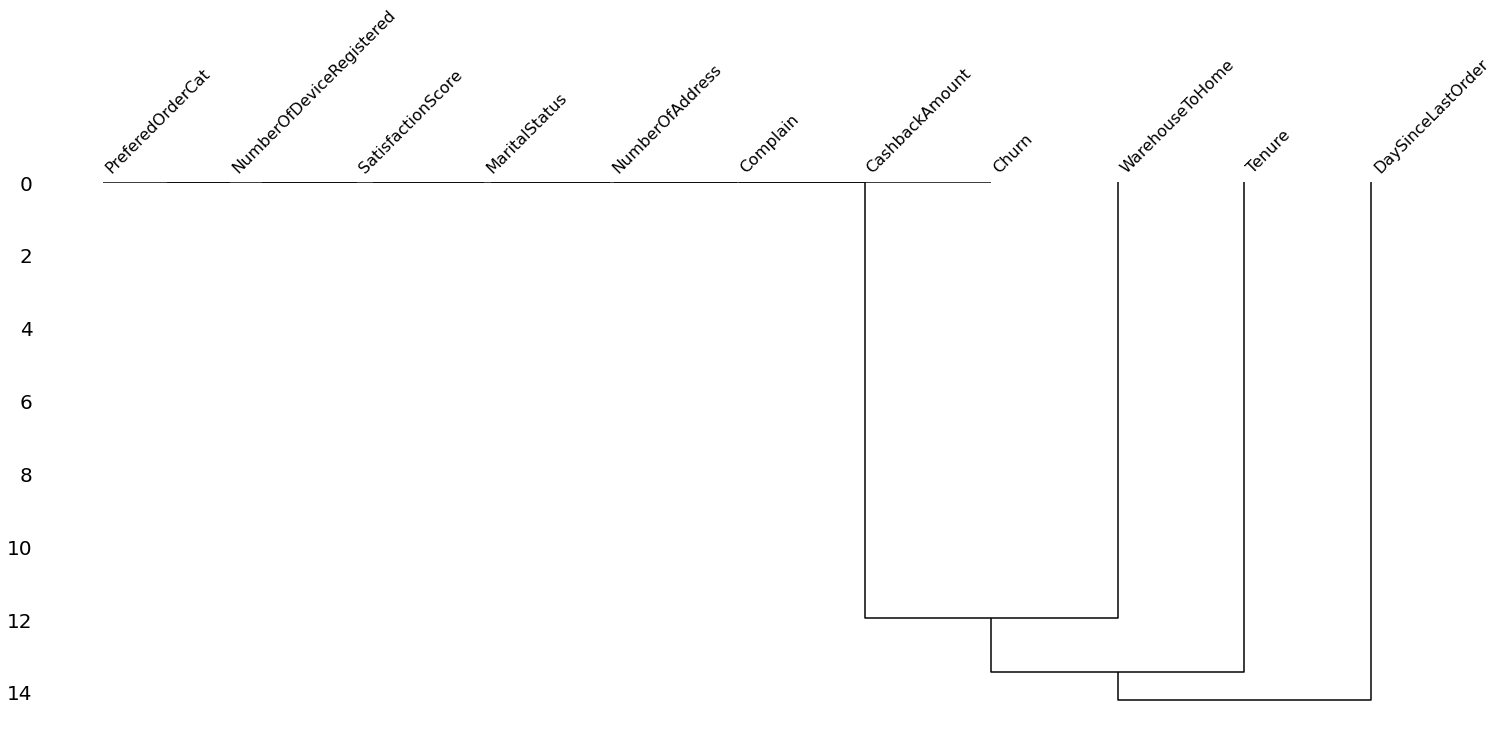

In [15]:
# dendogram
missingno.dendrogram(a)
plt.show()

Jika ditinjau antar-kolom yang memiliki missing value: 
* Terlihat bahwa persebaran data antar-kolom acak. 
* Korelasi antar-kolom yang memiliki missing value kecil
* Kolom Cashback Amount merupakan kolom yang memiliki hubungan paling dekat dengan kolom-kolom yang memiliki Missing Value

Ditinjau per kolom yang memiliki Missing Value :

**Tenure**

In [16]:
# Deskripsi Missing Value pada Kolom Tenure
display (a[(a['Tenure'].isna() == True)].describe(), a[(a['Tenure'].isna() == True)].describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,0.0,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,NaN,14.365269,3.269461,3.215569,3.203593,0.257485,1.988024,120.398563,0.353293
std,NaN,7.655504,0.824600,1.289997,2.438494,0.438564,2.364364,2.633351,0.479430
min,NaN,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,112.000000,0.000000
25%,NaN,8.000000,3.000000,3.000000,2.000000,0.000000,0.000000,120.220000,0.000000
50%,NaN,13.000000,3.000000,3.000000,2.000000,0.000000,2.000000,120.990000,0.000000
75%,NaN,19.000000,4.000000,4.000000,4.000000,1.000000,3.000000,122.190000,1.000000
max,NaN,34.000000,5.000000,5.000000,19.000000,1.000000,13.000000,123.130000,1.000000


,PreferedOrderCat,MaritalStatus
count,167,167
unique,2,3
top,Mobile Phone,Married
freq,161,80


In [17]:
# PreferedOrderCat pada Kolom Tenure yang memiliki Missing Value
a[(a['Tenure'].isna() == True)]['PreferedOrderCat'].value_counts()

Mobile Phone          161
Laptop & Accessory      6
Name: PreferedOrderCat, dtype: int64

In [18]:
# Ditinjau dari Cashback Amount
a[(a['CashbackAmount']>112)&(a['CashbackAmount']<123.13)]['Tenure'].unique()

array([nan])

Pola Missing Value pada kolom `Tenure`:
- Terdapat pada pelanggan yang mendapatkan CashbackAmount dari 112 USD - 123.13 USD
- Memiliki PreferedOrderCat Mobile Phone, Laptop & Accessory (barang-barang elektronik)

Namun data scientist tidak merasa ada hubungan dari segi logika terhadap Missing Value ini ditinjau dari poin-poin di atas. Namun karena data yang tersedia sudah sedikit maka data yang memiliki Missing Value tidak akan di-drop melainkan akan diisi median.

**WarehouseToHome**

In [19]:
# Deskripsi Missing Value pada Kolom WarehouseToHome
display (a[(a['WarehouseToHome'].isna() == True)].describe(), a[(a['WarehouseToHome'].isna() == True)].describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,143.000000,0.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,6.251748,NaN,3.223776,3.041958,3.608392,0.321678,2.468531,124.576154,0.377622
std,7.628217,NaN,0.867403,1.452895,2.616403,0.468762,2.785284,0.978181,0.486496
min,0.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,123.180000,0.000000
25%,0.000000,NaN,3.000000,2.000000,2.000000,0.000000,0.000000,123.720000,0.000000
50%,3.000000,NaN,3.000000,3.000000,2.000000,0.000000,2.000000,124.390000,0.000000
75%,11.000000,NaN,4.000000,4.000000,5.000000,1.000000,3.000000,125.480000,1.000000
max,30.000000,NaN,5.000000,5.000000,10.000000,1.000000,15.000000,126.570000,1.000000


,PreferedOrderCat,MaritalStatus
count,143,143
unique,2,3
top,Mobile Phone,Single
freq,137,63


In [20]:
# PreferedOrderCat pada Kolom WarehouseToHome yang memiliki Missing Value
a[(a['WarehouseToHome'].isna() == True)]['PreferedOrderCat'].value_counts()

Mobile Phone          137
Laptop & Accessory      6
Name: PreferedOrderCat, dtype: int64

In [21]:
# Ditinjau dari Cashback Amount
a[(a['CashbackAmount']>123.18)&(a['CashbackAmount']<126.57)]['WarehouseToHome'].unique()

array([nan])

Pola Missing Value pada kolom `WarehouseToHome`:
- Terdapat pada pelanggan yang mendapatkan CashbackAmount dari 123.18 USD - 126.57 USD
- Memiliki PreferedOrderCat Mobile Phone, Laptop & Accessory (barang-barang elektronik)

Missing Value ditemukan pada pelanggan yang suka membeli barang-barang elektronik. Hal ini mungkin saja terjadi karena barang elektronik merupakan barang yang cenderung mahal sehingga pelanggan memilih untuk mengambil langsung/pick-up barang yang dibeli ke gudang sehingga pelanggan tidak perlu mengisi alamat (jarak antara lokasi pelanggan dan gudang tidak diketahui)

Missing value akan diisi dengan median.

**DaySinceLastOrder**

In [22]:
# Deskripsi Missing Value pada Kolom DaySinceLastOrder
display(a[(a['DaySinceLastOrder'].isna() == True)].describe(), a[(a['DaySinceLastOrder'].isna() == True)].describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,0.0,175.000000,175.000000
mean,11.428571,15.902857,4.045714,2.954286,4.805714,0.285714,NaN,220.665029,0.188571
std,8.337306,8.314006,0.914865,1.421579,2.601275,0.453050,NaN,6.530776,0.392290
min,0.000000,6.000000,1.000000,1.000000,1.000000,0.000000,NaN,209.380000,0.000000
25%,5.000000,9.000000,4.000000,2.000000,3.000000,0.000000,NaN,214.820000,0.000000
50%,10.000000,14.000000,4.000000,3.000000,4.000000,0.000000,NaN,221.130000,0.000000
75%,17.500000,20.000000,5.000000,4.000000,6.000000,1.000000,NaN,226.465000,0.000000
max,31.000000,36.000000,6.000000,5.000000,11.000000,1.000000,NaN,231.420000,1.000000


,PreferedOrderCat,MaritalStatus
count,175,175
unique,3,3
top,Fashion,Married
freq,135,99


In [23]:
# Ditinjau dari Cashback Amount
a[(a['CashbackAmount']>209.38)&(a['CashbackAmount']<231.42)]['DaySinceLastOrder'].unique()

array([nan])

Pola Missing Value pada kolom `WarehouseToHome`:
- Terdapat pada pelanggan yang mendapatkan CashbackAmount dari 209.38 USD - 231.42 USD

Namun data scientist tidak merasa ada hubungan dari segi logika terhadap Missing Value ini ditinjau dari poin-poin di atas. Namun karena data yang tersedia sudah sedikit maka data yang memiliki Missing Value tidak akan di-drop melainkan akan diisi median.

In [24]:
# isi Missing Value
a['Tenure'].fillna(a['Tenure'].median(), inplace = True)
a['WarehouseToHome'].fillna(a['WarehouseToHome'].median(), inplace = True)
a['DaySinceLastOrder'].fillna(a['DaySinceLastOrder'].median(), inplace = True)

In [25]:
a.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

Sudah tidak ada data yang memiliki Missing Value. Mari melihat perbedaan distribusi data setelah data diisi Missing Value

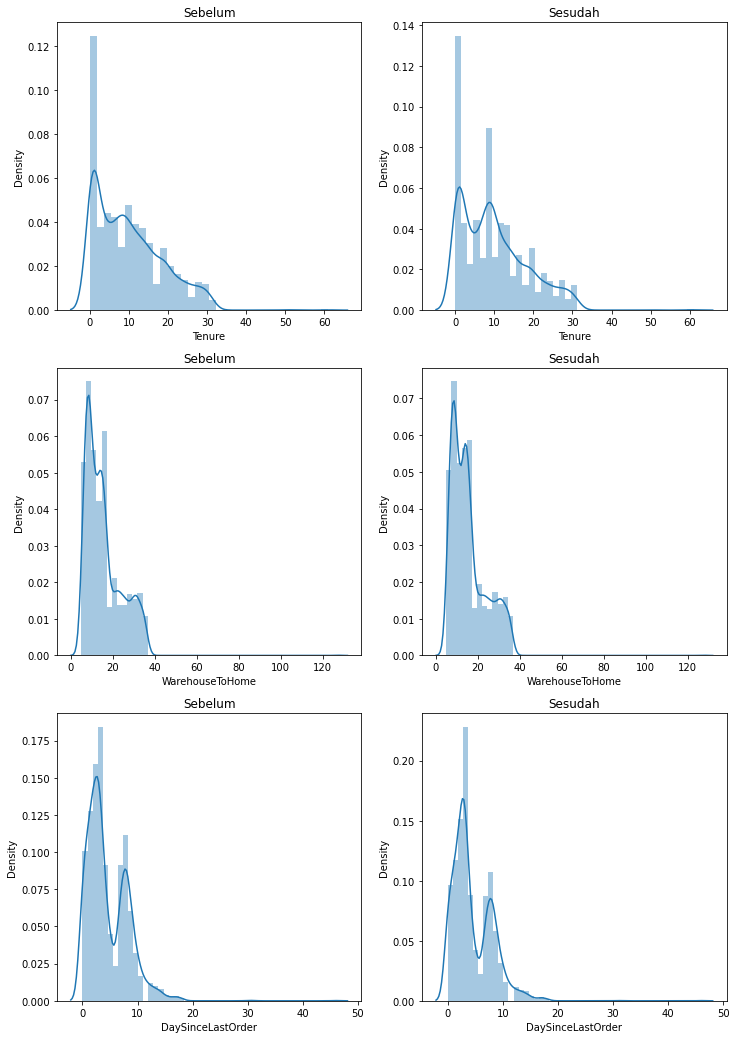

In [26]:
# Diagram distribusi pada variabel numerik
fig, axs =  plt.subplots(3, 2, figsize=(12,18))

# Tenure
sns.distplot (df['Tenure'], kde=True, ax=axs[0][0])
sns.distplot (a['Tenure'], kde=True, ax=axs[0][1])
axs[0][0].set_title("Sebelum")
axs[0][1].set_title("Sesudah")

# WarehouseToHome
sns.distplot (df['WarehouseToHome'], kde=True, ax=axs[1][0])
sns.distplot (a['WarehouseToHome'], kde=True, ax=axs[1][1])
axs[1][0].set_title("Sebelum")
axs[1][1].set_title("Sesudah")

# DaySinceLastOrder
sns.distplot (df['DaySinceLastOrder'], kde=True, ax=axs[2][0])
sns.distplot (a['DaySinceLastOrder'], kde=True, ax=axs[2][1])
axs[2][0].set_title("Sebelum")
axs[2][1].set_title("Sesudah")

plt.show()

Dapat dilihat dari diagram di atas bahwa perubahan distribusi tidak signifikan.

### 2.2.3 Data Setelah Dibersihkan

In [27]:
# menampilkan data yang sudah bersih
display(a.head(), a.tail())
display (a.info())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
11,16.0,20.0,2,Laptop & Accessory,5,Married,7,0,1.0,180.38,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,3.0,231.09,1
17,8.0,22.0,4,Fashion,2,Divorced,3,0,6.0,204.78,1


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,14.0,4,Mobile Phone,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3410 non-null   float64
 1   WarehouseToHome           3410 non-null   float64
 2   NumberOfDeviceRegistered  3410 non-null   int64  
 3   PreferedOrderCat          3410 non-null   object 
 4   SatisfactionScore         3410 non-null   int64  
 5   MaritalStatus             3410 non-null   object 
 6   NumberOfAddress           3410 non-null   int64  
 7   Complain                  3410 non-null   int64  
 8   DaySinceLastOrder         3410 non-null   float64
 9   CashbackAmount            3410 non-null   float64
 10  Churn                     3410 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 319.7+ KB


None

In [28]:
data = []
for i in a.columns:
    data.append([
        i,
        a[i].dtypes, # cek tipe data
        a[i].isna().sum(), # cek jumlah missing value
        round((a[i].isna().sum()/len(a))*100,3), # cek persentase missing value
        a[i].nunique(), # cek jumlah data unik
        a[i].unique() # cek isi data unik
    ])
pd.DataFrame(data=data,
            columns=[
                'Nama Variabel',
                'Tipe Data',
                'Null',
                'Presentase Null',
                'Jumlah Unique',
                'Unique'])

,Nama Variabel,Tipe Data,Null,Presentase Null,Jumlah Unique,Unique
0,Tenure,float64,0,0.0,35,"[15.0, 7.0, 16.0, 1.0, 8.0, 19.0, 0.0, 12.0, 3..."
1,WarehouseToHome,float64,0,0.0,33,"[29.0, 25.0, 20.0, 7.0, 22.0, 27.0, 33.0, 14.0..."
2,NumberOfDeviceRegistered,int64,0,0.0,6,"[4, 2, 5, 1, 3, 6]"
3,PreferedOrderCat,object,0,0.0,5,"[Laptop & Accessory, Mobile Phone, Fashion, Gr..."
4,SatisfactionScore,int64,0,0.0,5,"[3, 1, 5, 2, 4]"
5,MaritalStatus,object,0,0.0,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.0,14,"[2, 7, 3, 4, 10, 1, 8, 5, 6, 9, 11, 19, 22, 21]"
7,Complain,int64,0,0.0,2,"[0, 1]"
8,DaySinceLastOrder,float64,0,0.0,21,"[7.0, 1.0, 3.0, 6.0, 11.0, 2.0, 4.0, 0.0, 8.0,..."
9,CashbackAmount,float64,0,0.0,2167,"[143.32, 129.29, 180.38, 231.09, 204.78, 259.9..."


Jumlah baris berubah dari 3941 menjadi 3410 baris. Jumlah kolom tetap. Sudah tidak ada Missing Value. Masih ada data duplikat, namun hanya pada data yang pelanggannya churn.

## 2.3 Analisis Data

### 2.3.1 Informasi Variabel Numerik

In [29]:
a[['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder','CashbackAmount']].describe()

,Tenure,WarehouseToHome,NumberOfAddress,DaySinceLastOrder,CashbackAmount
count,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,10.054545,15.554839,4.241056,4.472141,177.021930
std,8.301305,8.332104,2.635801,3.583388,49.101722
min,0.000000,5.000000,1.000000,0.000000,0.000000
25%,3.000000,9.000000,2.000000,2.000000,145.730000
50%,9.000000,14.000000,3.000000,3.000000,163.800000
75%,15.000000,20.000000,6.000000,7.000000,195.050000
max,61.000000,127.000000,22.000000,46.000000,324.990000


Tidak terdapat anomali pada data. Seluruh data numerikal bernilai positif. Jumlah minimum dan maksimal pada data di atas juga wajar.

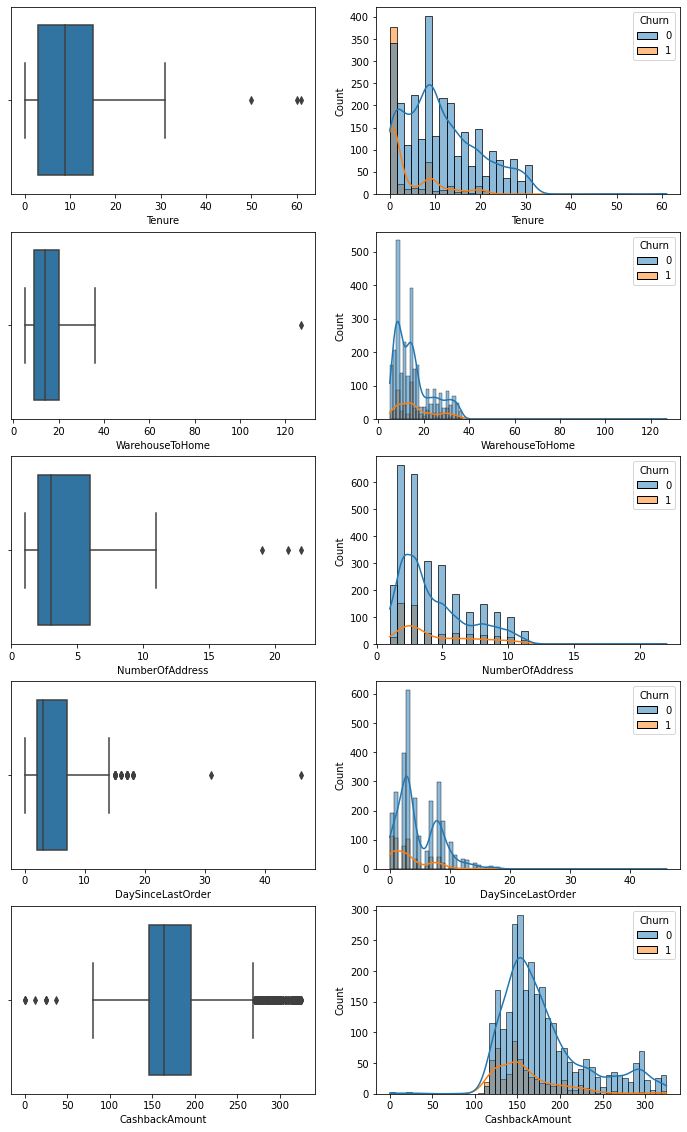

In [30]:
# Diagram distribusi pada variabel numerik
fig, axs =  plt.subplots(5, 2, figsize=(12,20))

# Tenure
sns.boxplot(a['Tenure'], ax=axs[0][0])
sns.histplot (data=a, x= 'Tenure', hue = 'Churn', kde=True, ax=axs[0][1])

# WarehouseToHome
sns.boxplot(a['WarehouseToHome'], ax=axs[1][0])
sns.histplot (data=a, x= 'WarehouseToHome', hue = 'Churn', kde=True, ax=axs[1][1])

# Number of Address
sns.boxplot(a['NumberOfAddress'], ax=axs[2][0])
sns.histplot (data=a, x= 'NumberOfAddress', hue = 'Churn', kde=True, ax=axs[2][1])

# DaySinceLastOrder
sns.boxplot(a['DaySinceLastOrder'], ax=axs[3][0])
sns.histplot (data=a, x= 'DaySinceLastOrder', hue = 'Churn', kde=True, ax=axs[3][1])

# CashbackAmount
sns.boxplot(a['CashbackAmount'], ax=axs[4][0])
sns.histplot (data=a, x= 'CashbackAmount', hue = 'Churn', kde=True, ax=axs[4][1])

plt.show()

Lewat diagram di atas, dapat disimpulkan bahwa:
* Fitur-fitur numerik pada dataset tidak terdistribusi normal
* Fitur `CashbackAmount` paling banyak memiliki outlier
* Tidak terdapat perbedaan distribusi yang jauh antara target 0 dan 1, kecuali pada fitur `Tenure`
* Pelanggan yang lebih baru lebih cenderung untuk churn

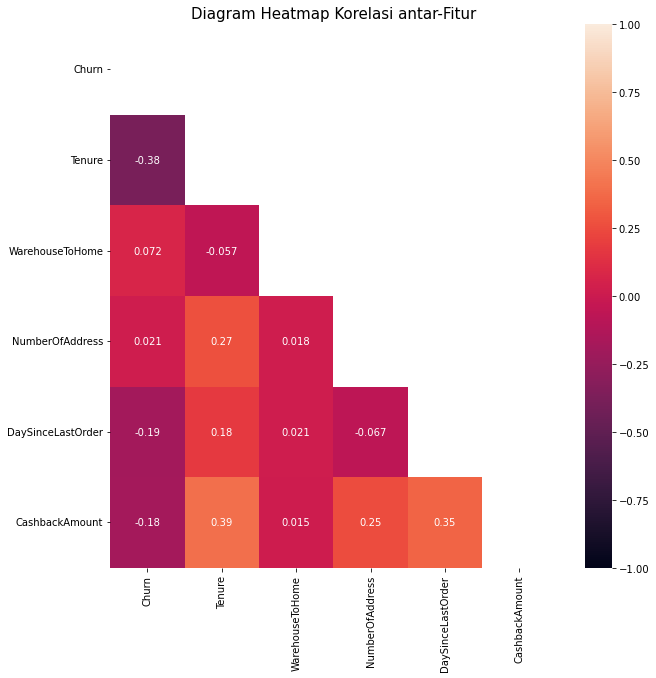

In [31]:
# Correlation Heatmap
corr_mat = a[['Churn','Tenure', 'WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder','CashbackAmount']].corr('spearman')
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)]=True

plt.figure (figsize=(10,10))
plt.title ("Diagram Heatmap Korelasi antar-Fitur", fontsize=15)
sns.heatmap(corr_mat, annot = True, vmax=1, vmin=-1, mask=mask)

plt.show()

Seluruh fitur numerik pada data memiliki korelasi positif di mana terdapat korelasi yang bersignifikasi sedang pada kolom:
* `Tenure` dan `CashbackAmount` yang menunjukkan bahwa semakin lama seorang menjadi pelanggan maka semakin banyak jumlah cashback yang diterima (cukup logis)
* Semakin banyak `CashbackAmount` maka semakin tinggi nilai `DaySinceLastOrder` (bisa diasumsikan bahwa jumlah promo cashback dulu memang lebih banyak daripada waktu belakangan)
* Semakin baru seseorang menjadi pelanggan, semakin tinggi pelanggan yang churn


### 2.3.2 Informasi Variabel Kategorik

In [32]:
# Melihat dependensi setiap fitur data kategorik
print("Uji Chi Squared pada Fitur Kategorik\n")
kategori = ['Churn','PreferedOrderCat', 'MaritalStatus', 'Complain', 'SatisfactionScore']
test = []
for i in kategori:
    for j in kategori:
        if i is not j and {i,j} not in test:
            test.append({i,j})
            pval = chi2_contingency(pd.crosstab(a[i], a[j]))[1]
            
            if pval <= 0.05:
                print(f"{i:19} & {j:19} dependen  , pval = {round(pval, 5)}")
            else:
                print(f"{i:19} & {j:19} independen, pval = {round(pval, 5)}")

Uji Chi Squared pada Fitur Kategorik

Churn               & PreferedOrderCat    dependen  , pval = 0.0
Churn               & MaritalStatus       dependen  , pval = 0.0
Churn               & Complain            dependen  , pval = 0.0
Churn               & SatisfactionScore   dependen  , pval = 0.0
PreferedOrderCat    & MaritalStatus       dependen  , pval = 0.0
PreferedOrderCat    & Complain            independen, pval = 0.27188
PreferedOrderCat    & SatisfactionScore   independen, pval = 0.11364
MaritalStatus       & Complain            independen, pval = 0.66413
MaritalStatus       & SatisfactionScore   dependen  , pval = 0.0
Complain            & SatisfactionScore   independen, pval = 0.12974


Berdasarkan hasil Uji Chi Squared, terlihat bahwa fitur `Churn` dependen dengan seluruh fitur kategorikal.

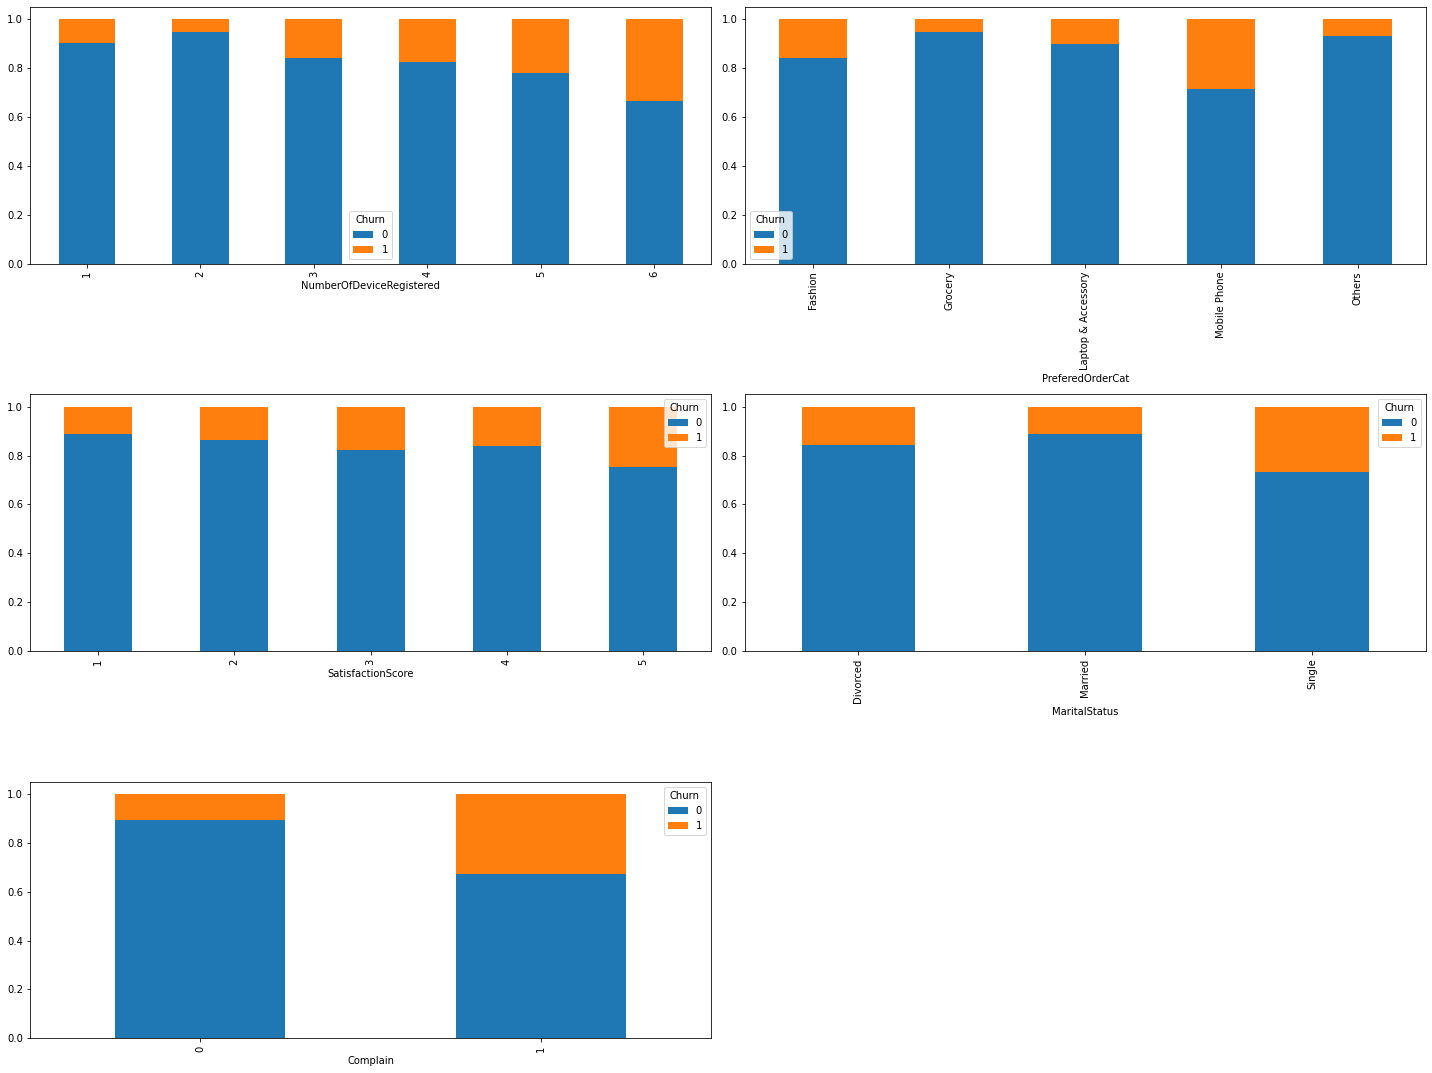

In [33]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in a.drop(columns=['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder','CashbackAmount', 'Churn']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(a[i],a['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [34]:
for i in a.drop(columns=['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder','CashbackAmount', 'Churn']).columns:
    kat_a = a.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(kat_a.sort_values(by=[1.0], ascending=False))

Churn,0,1
NumberOfDeviceRegistered,,
6,0.666667,0.333333
5,0.779093,0.220907
4,0.826469,0.173531
3,0.844181,0.155819
1,0.904110,0.095890
2,0.946746,0.053254


Churn,0,1
PreferedOrderCat,,
Mobile Phone,0.714055,0.285945
Fashion,0.841141,0.158859
Laptop & Accessory,0.901563,0.098437
Others,0.932099,0.067901
Grocery,0.949791,0.050209


Churn,0,1
SatisfactionScore,,
5,0.752547,0.247453
3,0.823819,0.176181
4,0.839150,0.160850
2,0.865330,0.134670
1,0.886981,0.113019


Churn,0,1
MaritalStatus,,
Single,0.731686,0.268314
Divorced,0.844758,0.155242
Married,0.887704,0.112296


Churn,0,1
Complain,,
1,0.670757,0.329243
0,0.893503,0.106497


Berdasarkan data di atas, dapat dilihat bahwa:
* Pelanggan yang memiliki `NumberOfDeviceRegistered` lebih banyak, lebih cenderung untuk churn
* Pelanggan yang memiliki `PreferedOrderCat`nya `Mobile Phone` lebih cenderung untuk churn
* Pelanggan yang `MaritalStatus` nya sendiri (`Single` atau `Divorced`) lebih cenderung untuk churn
* Pelanggan yang pernah komplain lebih cenderung untuk churn

# 3 Data Preparation
Data yang digunakan untuk pemodelan adalah data baru yang masih mentah supaya proses data cleaning dapat dilakukan di dalam Pipeline.

In [35]:
# load dataset dan disimpan pada variabel b
b = df.copy()

# drop data duplikat yang churn-nya sama dengan 0
jmlh = (b[b.duplicated()]['Churn']==0).tolist()
b.drop(index=[index for index, value in enumerate (jmlh) if value == True], inplace = True)

In [36]:
b.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
11,16.0,20.0,2,Laptop & Accessory,5,Married,7,0,1.0,180.38,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
17,8.0,22.0,4,Fashion,2,Divorced,3,0,6.0,204.78,1


## 3.1 Split Data

In [37]:
x = b.drop(columns = ['Churn'])
y = b['Churn']

In [38]:
x_train, x_test, y_train, y_test = train_test_split (x, y,
                                                    stratify=y,
                                                    test_size = 0.2,
                                                    random_state= 202)

## 3.2 Data Preprocessing

Data preprocessing yang dilakukan adalah:
1. Handling Missing Value pada kolom `Tenure`, `WarehouseToHome`, `DaySinceLastOrder` dengan mengisi median
2. Menggabungkan data Mobile dan MobilePhone pada `PreferedOrderCat` menjadi 1 kategori
3. Mengubah `PreferedOrderCat`, `MaritalStatus` menggunakan One Hot Encoding, karena fitur tidak memiliki urutan dan memiliki jumlah unique yang sedikit

In [39]:
# fungsi untuk mengubah value pada fitur PreferedOrderCat
def ubahisi (data) :
    data['PreferedOrderCat'] = data['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})
    return data


In [40]:
p1 = Pipeline ([
    ('name changer', FunctionTransformer(ubahisi)),
    ('one hot encoder', OneHotEncoder(drop='first'))
])

In [41]:
tf = ColumnTransformer([
    ('imputer', SimpleImputer(strategy='median'), ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
    ('pipeline', p1, ['PreferedOrderCat']),
    ('onehot2', OneHotEncoder(drop='first'), ['MaritalStatus'])
], remainder = 'passthrough')

# 4 Modeling & Evaluation

Pemilihan basis model yang digunakan adalah: Logistic Regression, K-Nearest Neighbor (KNN), Decision Tree Classifier, Random Forest Classifier, dan XGBoost. Parameter yang digunakan pada basemodel merupakan parameter default. Khusus untuk KNN, value dari data akan di scale terlebih dahulu menggunakan Standard Scaler.

In [42]:
# Define the models that are going to be used
logreg = LogisticRegression(random_state=202)
knn_scaled = Pipeline ([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
dt = DecisionTreeClassifier(random_state=202)
rf = RandomForestClassifier(random_state=202)
xgb = XGBClassifier(random_state=202)

In [43]:
# Cross Validation
# Define CV method
skfold = StratifiedKFold(n_splits=5)

# Model yang digunakan
models = [logreg, knn_scaled, dt, rf, xgb]
name = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

# Scorer yangn digunakan
fb = make_scorer(fbeta_score, beta=5)
scorer = {
    'Precision' : 'precision',
    'Recall' : 'recall',
    'F1' : 'f1',
    'Fbeta' : fb
}

## 4.1 Finding Benchmark Model

### 4.1.1 Model without Resampling

In [44]:
estimator = Pipeline ([
    ('preprocess', tf),
    ('model', logreg)
])
hyperparam_space = {
    'model' : models
}
grid = GridSearchCV (estimator,
                     param_grid = hyperparam_space,    
                     cv = skfold,
                     scoring = scorer, 
                     refit = 'Fbeta',
                     n_jobs = -1,
                    )

In [45]:
grid.fit (x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('name '
                                                                                          'changer',
                                                                                          FunctionTransformer(func=<function ubahi...
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=202, ...)]},
             refit='Fbeta',
             scoring={'F1': 'f1', 'Fbeta': make_scorer(fbeta_score, beta=5),
                      'Precision': 'precision', 'Recall': 'recall'})

In [46]:
pd.DataFrame(grid.cv_results_, index=name).iloc[:,[11,12,19,20,27,28,35,36]]

,mean_test_Precision,std_test_Precision,mean_test_Recall,std_test_Recall,mean_test_F1,std_test_F1,mean_test_Fbeta,std_test_Fbeta
Logistic Regression,0.735703,0.066261,0.461314,0.063304,0.562695,0.046861,0.467656,0.062323
KNN,0.722132,0.091400,0.407340,0.051591,0.516955,0.050646,0.414002,0.051502
Decision Tree,0.691929,0.083882,0.668139,0.045045,0.678363,0.057716,0.668817,0.045323
Random Forest,0.832195,0.065391,0.650842,0.079850,0.727673,0.062806,0.656051,0.078599
XGBoost,0.796330,0.053581,0.728401,0.049022,0.759358,0.039719,0.730610,0.047928


Dari hasil cross validasi dengan data train, model yang paling baik adalah XGBoost. Mari kita coba uji dengan data test.

In [47]:
# Test with data test
estimator = Pipeline ([
    ('preprocess', tf),
    ('model', xgb)
])
estimator.fit (x_train, y_train)
y_pred = estimator.predict (x_test)

In [48]:
print ('Precision ', precision_score(y_test, y_pred))
print ('Recall ', recall_score(y_test, y_pred))
print ('F1 score ', f1_score(y_test, y_pred))
print ('F-beta score ', fbeta_score(y_test, y_pred, beta=5))

Precision  0.87
Recall  0.75
F1 score  0.8055555555555555
F-beta score  0.754


Dapat dilihat, tanpa balancing model, model yang terpilih merupakan model XGBoost dengan nilai F-beta score 75.4%

### 4.1.2 Balancing Model
Perlu dilakukan balancing model karena data imbalance sekitar 1:5. Karena data sedikit, jenis resampling yang dipilih tidak menggunakan jenis yang dapat menghapus data, yaitu SMOTE dan RandomOverSampler.

In [49]:
# define oversampler
sm = SMOTE (random_state = 202)
rom = RandomOverSampler(random_state=202)

In [50]:
# define model
estimator = Pipeline ([
    ('preprocess', tf),
    ('balancing', rom),
    ('model', logreg)
])

hyperparam_space = {
    'model' : models,
    'balancing' : [sm, rom]
}

grid = GridSearchCV (estimator,
                     param_grid = hyperparam_space,    
                     cv = skfold,
                     scoring = scorer, 
                     refit = 'Fbeta',
                     n_jobs = -1,
                    )

In [51]:
# fitting
grid.fit (x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('name '
                                                                                          'changer',
                                                                                          FunctionTransformer(func=<function ubahi...
                                                 max_bin=256,
                                                 max_cat_threshold=64,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=100, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=202, ...)]},
             refit='Fbeta',
             scoring={'F1': 'f1', 'Fbeta': make_scorer(fbeta_score, beta=5),
                      'Precision': 'precision', 'Recall': 'recall'})

In [52]:
hasil_balanced = pd.DataFrame(grid.cv_results_, index=name+name)
hasil_balanced.insert(0, 'Balancing', ['SMOTE']*5+['RandomOverSampler']*5)

In [53]:
hasil_balanced.sort_values('rank_test_Fbeta').iloc[:,[0,1,13,14,21,22,29,30,37,38, 39]]

,Balancing,mean_fit_time,mean_test_Precision,std_test_Precision,mean_test_Recall,std_test_Recall,mean_test_F1,std_test_F1,mean_test_Fbeta,std_test_Fbeta,rank_test_Fbeta
KNN,RandomOverSampler,0.041528,0.528837,0.035634,0.838406,0.022272,0.647330,0.023091,0.819558,0.017970,1
XGBoost,RandomOverSampler,0.459236,0.774123,0.058105,0.775853,0.039925,0.772956,0.029475,0.775494,0.037909,2
Logistic Regression,RandomOverSampler,0.080940,0.429680,0.038228,0.801730,0.014486,0.558329,0.032009,0.775420,0.012865,3
KNN,SMOTE,0.049467,0.551872,0.046764,0.784502,0.013275,0.646910,0.034510,0.771722,0.014020,4
Logistic Regression,SMOTE,0.098536,0.438726,0.047139,0.782375,0.013575,0.560310,0.036430,0.758792,0.008910,5
Random Forest,RandomOverSampler,0.568770,0.793782,0.046520,0.726274,0.088617,0.755845,0.060340,0.728325,0.086529,6
XGBoost,SMOTE,0.930807,0.806023,0.063904,0.706849,0.041926,0.751731,0.041072,0.710034,0.041309,7
Random Forest,SMOTE,0.772531,0.786555,0.065616,0.683240,0.092730,0.728102,0.068842,0.686336,0.090893,8
Decision Tree,SMOTE,0.048270,0.670126,0.051362,0.685437,0.034868,0.677147,0.039182,0.684752,0.034792,9
Decision Tree,RandomOverSampler,0.038375,0.708050,0.091445,0.678869,0.066112,0.690941,0.067483,0.679644,0.065470,10


In [54]:
# hasil_balanced.iloc[:,[0,37,38, 39]]

Dari data di atas, dapat terlihat bahwa 3 ranking teratas dari hasil cross validasi merupakan KNN, XGBoost, dan Logistic Regression menggunakan teknik RandomOverSampler. Ketiga model ini akan dicoba ke data test.

In [55]:
# Data Test dicoba di logreg, knn, dan xgb
test_result = []
for i in [logreg, knn_scaled, xgb] :
    estimator = Pipeline ([
        ('preprocess', tf),
        ('balancing', rom),
        ('model', i)
    ])
    estimator.fit (x_train, y_train)
    y_pred = estimator.predict (x_test)
    
    test_result.append (
        [precision_score(y_test, y_pred),
         recall_score(y_test, y_pred),
         f1_score(y_test, y_pred),
         fbeta_score(y_test, y_pred, beta=5)]
    )

In [56]:
pd.DataFrame (data=test_result, index = ['Logistic Regression','KNN', 'XGBoost'], columns = scorer.keys() )

,Precision,Recall,F1,Fbeta
Logistic Regression,0.419643,0.810345,0.552941,0.782330
KNN,0.510638,0.827586,0.631579,0.808290
XGBoost,0.834783,0.827586,0.831169,0.827861


Pada tabel di atas, terlihat bahwa model yang terbaik merupakan XGBoost (sama seperti sebelum dilakukan treatment balancing). Dan terdapat perubahan yang cukup signifikan di mana sebelum data diseimbangkan hasil fbeta score 75.4% sedangkan setelah data diseimbangkan fbeta score menjadi 82.79%. Maka model yang dipilih adalah XGBoost yang diseimbangkan menggunakan teknik Random Over Sampler.

**Mengenai teknik resampling yang terpilih : RandomOverSampler**  
Teknik yang paling sederhana dari teknik oversampling. Kelas minoritas (churn = 1) diduplikasi secara acak berulang-ulang  hingga distribusi kelas menjadi lebih seimbang.
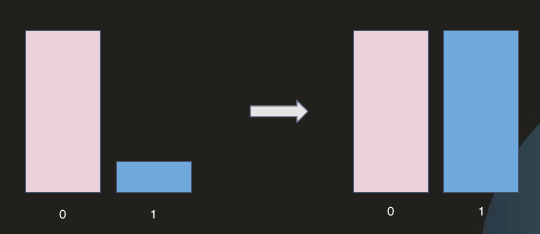

**Mengenai model yang terpilih: XGBoost Classifier**  
XGBoost (Extreme Gradient Boost) merupakan sebuah algoritma model yang cukup populer. Untuk mengerti XGBoost, harus mengerti mengenai Decision Tree terlebih dahulu karena model XGBoost yang dipakai memiliki baselearner Decision Tree.

Decision Tree/Pohon Keputusan merupakan sebuah model yang memprediksi label dengan memberikan pertanyaan if-else yang mengarah ke suatu keputusan. Decision Tree ini memiliki struktur pohon di mana setiap simpul memiliki fitur, setiap cabang mewakili keputusan, dan setiap simpul daun mewakili hasilnya.
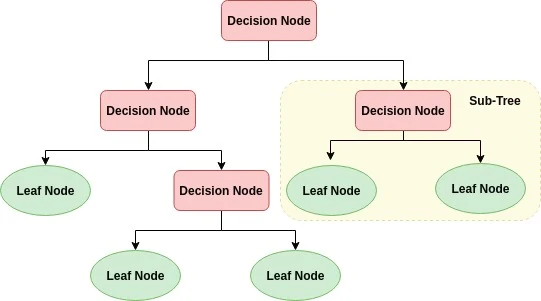

Namun karena hasil dari Decision Tree sering menyebabkan overfitting. Teknik Gradient Boosting (GDBT) diperkenalkan. Boosting merupakan metode yang sifatnya iteratif di mana banyak pohon keputusan dibuat. Setiap pohon keputusan dibuat berdasarkan dengan proporsi fitur yang berbeda-beda di mana pohon keputusan selanjutnya akan belajar dari pohon keputusan sebelumnya dan memberikan beban terhadap fitur yang dipakai. Hal ini dapat membuat sejumlah weak learner digabung sehingga menghasilkan strong learner. Gradient Boosting adalah perpanjangan dari boosting di mana proses ini terinspirasi dari penurunan gradien di mana cara kerjanya adalah membangun satu pohon untuk menyesuaikan data, lalu tree berikutnya dibangun untuk mengurangi residue (error).

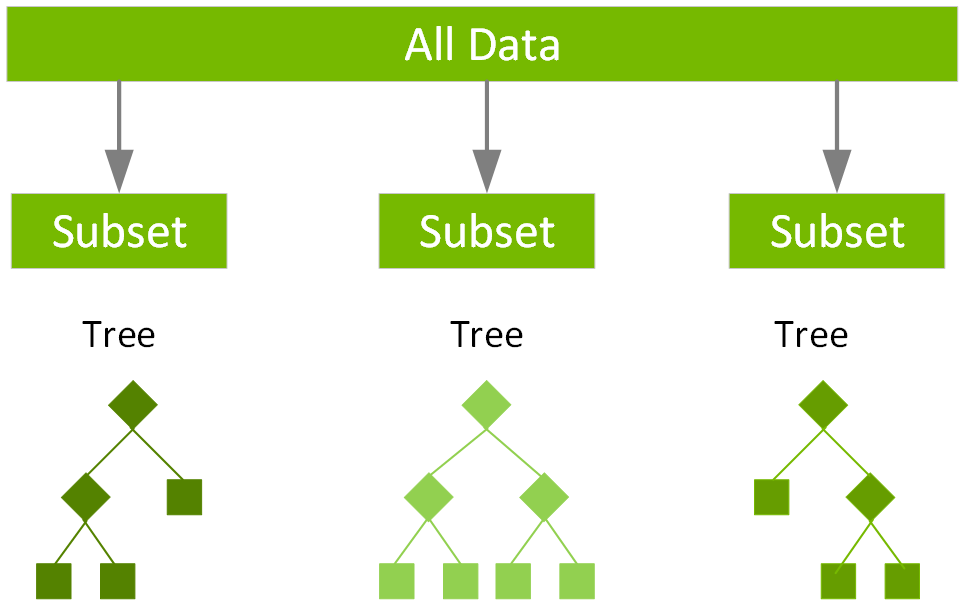

Pada **XGBoost** algoritma dasarnya sama seperti gradient boost, namun proses ini dapat dilakukan secara paralel. Terdapat proses tambahan sehingga XGBoost lebih *powerful* dibandingkan GDBT. Proses ini termasuk pemangkasan, newton boosting, dan parameter pengacakan ekstra. 

Proses pemangkasan atau penyusutan proporsional simpul daun digunakan untuk meningkatkan generalisasi model. proses newton boosting adalah proses untuk menyediakan rute langsung sehingga tidak memerlukan penurunan gradient. Proses pengacakan parameter bertujuan untuk mengurangi korelasi antar tree sehingga dapat meningkatkan kekuatan algoritma ensemble. 

Source:  
https://www.datacamp.com/tutorial/decision-tree-classification-python  
https://www.nvidia.com/en-us/glossary/data-science/xgboost/  
https://www.dqlab.id/algoritma-machine-learning-yang-perlu-dipelajari


# 4.2 Hyperparameter Tuning

Hyperparameter Tuning berfungsi untuk meningkatkan performa model dengan mencoba model dengan berbagai parameter. Parameter-paramater XGBoost yang akan digunakan untuk tuning kali ini:
* `learning rate` angka ukur/bobot yang dilakukan untuk memperbaharui bobot tiap fitur (default 0.3)
* `gamma` angka pengurangan minimum yang dilakukan untuk membuat partisi pada node leaf pada pohon. (default 0)
* `max_depth` Kedalaman maksimum pohon (default 6)
* `n_estimator` jumlah perulangan yang akan dicoba & dipelajari oleh model (default 100)
* `colsample_bytree` rasio subsampel kolom saat membangun setiap ohon. (default 1)

source: https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [57]:
estimator = Pipeline ([
    ('preprocess', tf),
    ('balancing', rom),
    ('model', xgb)
])

In [58]:
# estimator.get_params()

In [59]:
# parameter-parameter yang dituning
hyperparam_space = [
    {"model__learning_rate" : [0.3], "model__n_estimators" : [100], "model__max_depth" : [3,4,5,6], "model__gamma" : [0,1,2,3], "model__colsample_bytree" : [0.6,0.8,1]}, # default
    {"model__learning_rate" : [0.1], "model__n_estimators" : [200], "model__max_depth" : [3,4,5,6], "model__gamma" : [0,1,2,3], "model__colsample_bytree" : [0.6,0.8,1]},
    {"model__learning_rate" : [0.05], "model__n_estimators" : [400], "model__max_depth" : [3,4,5,6], "model__gamma" : [0,1,2,3], "model__colsample_bytree" : [0.6,0.8,1]},
    {"model__learning_rate" : [0.005], "model__n_estimators" : [4000], "model__max_depth" : [3,4,5,6], "model__gamma" : [0,1,2,3], "model__colsample_bytree" : [0.6,0.8,1]}]

In [60]:
# hyperparameter tuning
grid = GridSearchCV (estimator,
                     param_grid = hyperparam_space,    
                     cv = skfold,
                     scoring = fb,
                     n_jobs = -1,)

In [61]:
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('name '
                                                                                          'changer',
                                                                                          FunctionTransformer(func=<function ubahi...
                          'model__n_estimators': [200]},
                         {'model__colsample_bytree': [0.6, 0.8, 1],
                          'model__gamma': [0, 1, 2, 3],
                          'model__learning_rate': [0.05],
                          'model__max_depth': [3, 4, 5, 6],
                          'model__n_estimators': [400]},
                         {'model__colsample_bytree': [0.6, 0.8, 1],
                          'model__gamma': [0, 1, 2, 3],
                          'model__learning_rate': [0.005],
                          'model__max_depth': [3, 4, 5, 6],
                          'model__n_estimators': [4000]}],
             scoring=make_scorer(fbeta_score, beta=5))

In [62]:
pd.DataFrame(grid.cv_results_)[["params", "mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]].sort_values("rank_test_score")

,params,mean_fit_time,mean_test_score,std_test_score,rank_test_score
42,"{'model__colsample_bytree': 1, 'model__gamma':...",0.516618,0.815574,0.035918,1
95,"{'model__colsample_bytree': 1, 'model__gamma':...",1.243874,0.814041,0.042170,2
60,"{'model__colsample_bytree': 0.6, 'model__gamma...",0.530781,0.813827,0.022595,3
46,"{'model__colsample_bytree': 1, 'model__gamma':...",0.541153,0.812966,0.037583,4
28,"{'model__colsample_bytree': 0.8, 'model__gamma...",0.304187,0.812535,0.031708,5
...,...,...,...,...,...
67,"{'model__colsample_bytree': 0.8, 'model__gamma...",1.150927,0.762818,0.039353,188
2,"{'model__colsample_bytree': 0.6, 'model__gamma...",0.422378,0.758145,0.058132,189
7,"{'model__colsample_bytree': 0.6, 'model__gamma...",0.475926,0.754443,0.052358,190
3,"{'model__colsample_bytree': 0.6, 'model__gamma...",0.495675,0.750817,0.051702,191


In [63]:
# Parameter Terbaik Hasil Tuning
grid.best_params_

{'model__colsample_bytree': 1,
 'model__gamma': 2,
 'model__learning_rate': 0.3,
 'model__max_depth': 5,
 'model__n_estimators': 100}

Dapat terlihat bahwa parameter yang terpilih semuanya merupakan parameter default, kecuali parameter max_depth pada angka 5

In [64]:
# Diuji ke datatest
best_estimator = grid.best_estimator_
best_estimator.fit (x_train, y_train)
y_pred_tuned = estimator.predict (x_test)
print ('Precision ', precision_score(y_test, y_pred))
print ('Recall ', recall_score(y_test, y_pred))
print ('F1 score ', f1_score(y_test, y_pred))
print ('F-beta score ', fbeta_score(y_test, y_pred, beta=5))

Precision  0.8347826086956521
Recall  0.8275862068965517
F1 score  0.8311688311688311
F-beta score  0.827860696517413


**Before Tuning vs After Tuning**

In [65]:
# before tuning
estimator = Pipeline ([
    ('preprocess', tf),
    ('balancing', rom),
    ('model', xgb)
])
estimator.fit (x_train, y_train)
y_pred = estimator.predict (x_test)

test_result = []
test_result.append (
    [precision_score(y_test, y_pred),
     recall_score(y_test, y_pred),
     f1_score(y_test, y_pred),
     fbeta_score(y_test, y_pred, beta=5)]
    )
before_tuning = pd.DataFrame (data=test_result, index = ['XGBoost Before'], columns = scorer.keys() )
before_tuning

,Precision,Recall,F1,Fbeta
XGBoost Before,0.834783,0.827586,0.831169,0.827861


In [66]:
# After Tuning
best_estimator.fit (x_train, y_train)
y_pred_tuned = estimator.predict (x_test)

test_result = []
test_result.append (
    [precision_score(y_test, y_pred),
     recall_score(y_test, y_pred),
     f1_score(y_test, y_pred),
     fbeta_score(y_test, y_pred, beta=5)]
    )
after_tuning = pd.DataFrame (data=test_result, index = ['XGBoost After'], columns = scorer.keys() )
after_tuning

,Precision,Recall,F1,Fbeta
XGBoost After,0.834783,0.827586,0.831169,0.827861


Tidak terdapat perbedaan antara angka sebelum tuning dan setelah tuning. Hal ini wajar karena parameter yang digunakan betul-betul mirip, hanya berbeda max_depth. Parameter yang dipilih adalah parameter after tuning di mana max_depth = 5 karena dinilai pohon keputusan yang dibuat lebih sederhana.

## 4.3 Feature Importances

Melihat fitur apa saja yang penting dalam memprediksi churn.

Menggunakan plot shap:

In [67]:
xtp = tf.fit_transform(x_train)
xtp2 = tf.fit_transform(x_test)
features = tf.transformers_[0][2] + list(tf.transformers_[1][1][1].get_feature_names())+list(tf.transformers_[2][1].get_feature_names())+list(x.columns[tf.transformers_[3][2]])

In [68]:
x_train_prep = pd.DataFrame (xtp, columns=features)
x_test_prep = pd.DataFrame (xtp2, columns = features)

In [69]:
np.random.seed(123)
xgb_best = XGBClassifier(colsample_bytree = 1, gamma = 2, learning_rate = 0.3, max_depth = 5, n_estimators = 100)
xgb_best.fit (x_train_prep, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

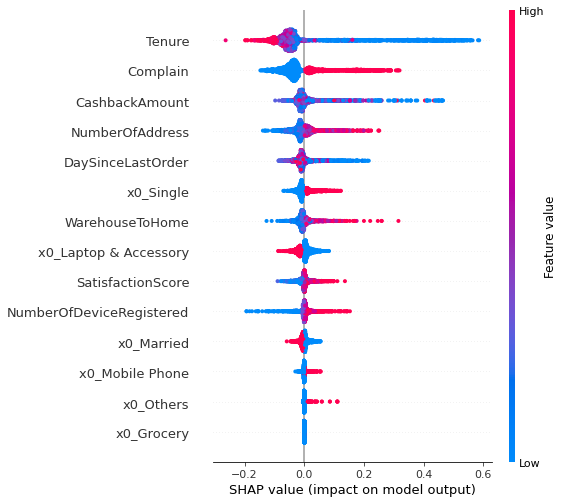

In [70]:
shap_value = shap.TreeExplainer(xgb_best,
                                data = x_train_prep,
                                feature_dependence = 'independent',
                                model_output = 'probability'
                               ).shap_values (x_train_prep)
shap.summary_plot(shap_value, x_train_prep, feature_names = features)

Dari plot SHAP di atas, dapat dilihat bahwa 5 fitur terpenting (secara berurutan dari yang paling penting) adalah: `Tenure`, `Complain`, `CashbackAmount`, `NumberOfAddress`, dan `DaySinceLastOrder`, di mana:
* Potensi churn semakin meningkat pada pelanggan yang baru berlangganan (nilai tenure kecil)
* Potensi churn semakin meningkat ketika pelanggan komplain
* Potensi churn semakin meningkat ketika jumlah cashback yang diterima pelanggan semakin sedikit
* Potensi churn semakin meningkat ketika semakin banyak jumlah alamat pelanggan yang terdaftar
* Potensi churn semakin meningkat pada pelanggan yang baru berbelanja

Selain itu:
* Potensi churn semakin meningkat pada pelanggan yang single
* Potensi churn semakin meningkat ketika jarak antara alamat pelanggan dan gudang semakin jauh
* Potensi churn semakin meningkat ketika tingkat satisfaction score semakin tinggi
* Potensi churn semakin meningkat ketika kategori yang dibeli bukan Laptop & Accessory, sedangkan potensi churn semakin meningkat ketika kategori yang dibeli adalah mobile phone

Plot shap konsisten dengan EDA yang dilakukan sebelumnya, di mana:
* Semakin baru seseorang menjadi pelanggan, semakin tinggi pelanggan yang churn
* Pelanggan yang pernah komplain lebih cenderung untuk churn
* Pelanggan yang memiliki `PreferedOrderCat` `Mobile Phone` lebih cenderung untuk churn
* Pelanggan yang sendiri lebih cenderung untuk churn

Namun analisis lebih lanjut harus dilakukan untuk menemukan penyebab hubungan kausalitas/korelasi terutama pada poin-poin yang tidak terdapat pada EDA.

## 4.4 Model & Evaluation

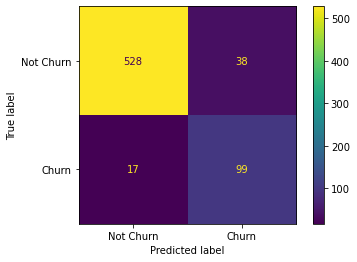

In [71]:
# Confusion Matrix
plot_confusion_matrix(best_estimator, x_test, y_test, display_labels=['Not Churn', 'Churn'])
plt.show()

In [72]:
after_tuning

,Precision,Recall,F1,Fbeta
XGBoost After,0.834783,0.827586,0.831169,0.827861


In [73]:
print (classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       566
           1       0.83      0.83      0.83       116

    accuracy                           0.94       682
   macro avg       0.90      0.90      0.90       682
weighted avg       0.94      0.94      0.94       682



Berdasarkan hasil pada model pada classification report: 

Dapat disimpulkan bahwa model dapat mengidentifikasi 97% pelanggan yang tidak akan churn dan juga berhasil mengidentifikasi 83% pelanggan yang akan churn. (berdasarkan recall)

Model ini memiliki ketepatan prediksi 83% di mana ada kemungkinan 17% dari pelanggan yang diprediksi churn ini ternyata tidak churn. (berdasarkan precision)

Untuk mengevaluasi model yang sudah ditetapkan (XGBoost Classifier), skenario bisnis akan dibuat seperti ini:

Diasumsikan bahwa biaya untuk mencari pelanggan baru 5x lebih mahal dibandingkan biaya untuk menarik pelanggan lama (retensi) sehingga:
* True Negative (TN) membutuhkan **0 * cost** karena merupakan pelanggan yang tidak churn dan diprediksi tidak churn
* False Negative (FN) membutuhkan cost tertinggi karena hasil FN merupakan pelanggan yang tidak terdeteksi akan churn sehingga harus membayar biaya mengakuisisi pelanggan. Diasumsikan membutuhkan **5 * cost**
* True Positive (TP) & False Positive (FP) merupakan pelanggan yang diprediksikan churn sehingga harus membayar biaya retensi sebanyak **1 * cost**

sehingga rumus untuk menghitung cost:
\begin{align}
Cost (c) = 5 * (c) * FN + 1 * (c) * (TP+FP) + 0 * (c) * TN 
\end{align}

Hasil :  
1. Skenario tidak memakai model & berasumsi semua pelanggan tidak churn  
Pada realitanya terdapat 137 pelanggan yang churn sehingga dibutuhkan biaya **5 * 137 (c) = 685 (c)**
2. Skenario tidak memakai model & fokus retensi kepada semua pelanggan  
Perusahaan membutuhkan **1 * 682 (c) = 682 (c)**
3. Skenario memakai model data scientist dan melakukan marketing sesuai kebutuhan  
Dengan menggunakan model XGBoost di atas maka butuh biaya : **5 * 17 (c) + 1 * (99+38) (c) + 0 * 528 (c) = 222 (c)**

In [74]:
cost = {
    'No Model' : [685],
    'Voucher to All Customer' : [682],
    'with XGBoost Model' : [222]
}
cost_comparison = pd.DataFrame (data=cost, index = ['Cost Amplification'])
cost_comp = cost_comparison.T.sort_values ('Cost Amplification', ascending = False)

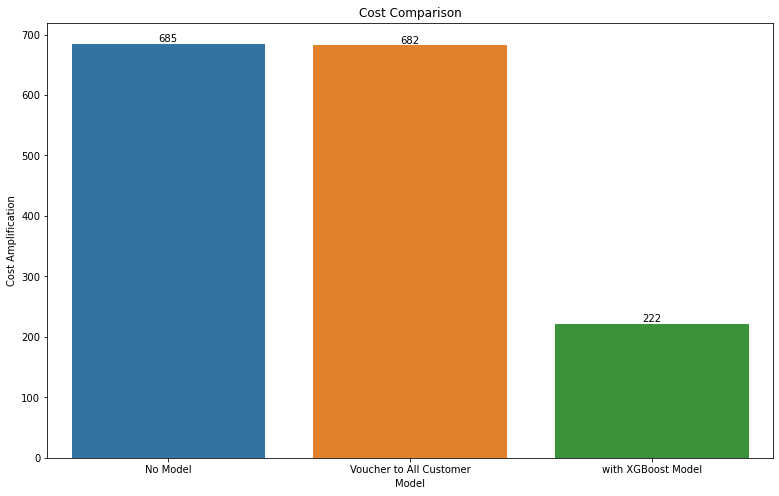

In [75]:
plt.figure (figsize = (13,8))

ax = sns.barplot (cost_comp.index, cost_comp['Cost Amplification'])
plt.title ('Cost Comparison')
plt.xlabel ('Model')
ax.bar_label (ax.containers[0])
plt.show()

Lewat analisis di atas, dapat disimpulkan bahwa dengan menggunakan XGBoost yang sudah di tuned, biaya yang bisa direduksi 67.5% daripada menggunakan tanpa model ataupun fokus retensi kepada semua pelanggan.

Ini berarti perusahaan dapat **menghemat sekitar 67.5% dari total biaya**.

Jika diasumsikan biaya untuk mengembalikan pelanggan lama USD 10, maka biaya yang dibutuhkan untuk:
* No Model: USD 6850
* Fokus retensi kepada semua pelanggan: USD 6820
* Menggunakan Model XGBoost yang Dituning: USD 2220

Ini berarti perusahaan dapat **menghemat sekitar USD 4600**.

# 5 Conclusion & Recommendation

## 5.1 Conclusion
Berdasarkan analisis & pemodelan yang sudah dilakukan :
1. Model yang terpilih merupakan model dengan **XGBoost Classifier** yang sudah dituning dengan 
2. Parameter terbaik hasil **hyperparameter tuning** adalah {'model__colsample_bytree': 1, 'model__gamma': 2, model__learning_rate': 0.3, 'model__max_depth': 5, 'model__n_estimators': 100}
3. Model dapat mengidentifikasi 97% pelanggan yang tidak akan churn dan juga **berhasil mengidentifikasi 83% pelanggan yang akan churn**. (berdasarkan recall)
4. Model ini memiliki **ketepatan prediksi 83%** di mana ada kemungkinan 17% dari pelanggan yang diprediksi churn ini ternyata tidak churn. (berdasarkan precision)
5. Model dapat **menghemat sekitar 67.5% dari total biaya** dengan asumsi biaya akuisisi pelanggan baru 5x lebih mahal dari biaya mengembalikan pelanggan lama
6. Limitasi dari model sebatas oleh value dari data yang sudah tersedia sebelumnya
7. Lima fitur terpenting (secara berurutan) berdasarkan model prediksi yang dibuat, dan shap plot merupakan `Tenure`, `Complain`, `CashbackAmount`, `NumberOfAddress`, dan `DaySinceLastOrder`

## 5.2 Recommendation
Rekomendasi berdasarkan hasil analisis & pemodelan di atas adalah:
1. Untuk membuat model yang telah dibuat data scientist lebih, dapat:
    * Menambahkan data karena isi data sangat kecil, terutama untuk kelas 1 (churn)
    * Mencoba model hanya menggunakan fitur-fitur terpenting
    * Menambahkan fitur-fitur baru yang dapat berguna untuk churn prediction. Contoh berdasarkan artikel oleh Sid Dhuri:
        * Customer charateristic (Industry, Size, Revenue)
        * Product Charateristics (Type, Offline/Online)
        * Transaction HIstory (Recency, Frequency, Monetary Value, Length of Relationship)
        * Customer Engangement (CSAT, NPS)
        * User Experience (Hours Spent, Number of Visit, Ease of Use)
        * Faktor Eksternal (R&D Spent  Budget, Economic Indicators)
    * Mencoba algoritma Machine Learning, khususnya dengan metode gradient boosting, seperti AdaBoosting, LightGBM
    * Mencoba kembali hyperparameter tuning dengan parameter-parameter yang berbeda
    * Menganalisis data yang memiliki prediksi False Positive (FP) dan False Negative (FN) untuk mengetahui karakteristik dari data-data tersebut 
2. Membuat analisis lebih lanjut terhadap fitur-fitur berdasarkan plot shap & EDA yang sudah dilakukan untuk menemukan penyebab hubungan kausalitas/korelasi untuk mengurangi kemungkinan pelanggan churn. Hal-hal yang bisa dianalisis, salah satunya:
    * Apakah ada masalah pengiriman barang? (Karena pelanggan yang memiliki banyak alamat dan memiliki alamat yang jauh dari gudang cenderung untuk churn)
    * Apakah ada perubahan kebijakan dari perusahaan yang baru-baru ini diputuskan mempengaruhi tingkat churn? (pelanggan baru dan pelanggan yang baru membeli cenderung untuk churn)
    * Analisis komplain seperti apa yang dilakukan oleh pelanggan?

Source :  
https://siddhuri.medium.com/top-6-data-to-consider-for-feature-engineering-when-modelling-customer-churn-558c484d0e20

# 6 Save & Load Model

In [76]:
import pickle

In [77]:
# save model
save_model = grid.best_estimator_
save_model.fit (x, y)
pickle.dump(save_model, open('model_ecommercechurn.sav', 'wb'))

In [78]:
# load model
loaded_model = pickle.load(open('model_ecommercechurn.sav', 'rb'))